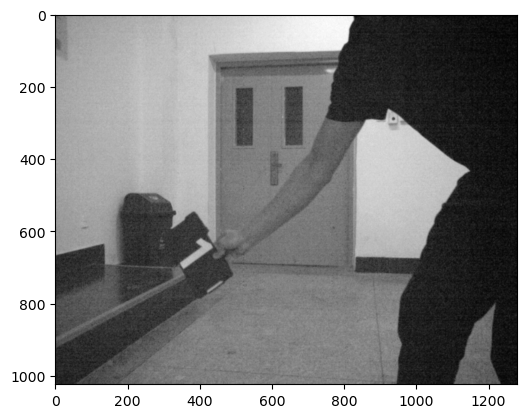

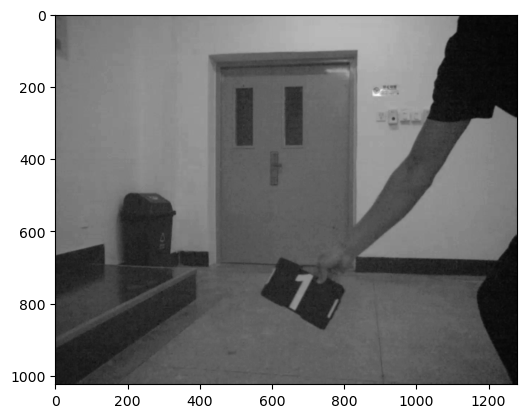

In [2]:
import cv2
import numpy as np
from need import plt_show0
from need import plt_show
from need import gray_guss
path3='D:/pycv/lessons/res/img3.png'
path2='D:/pycv/lessons/res/img2.png'
ori_img3=cv2.imread(path3)
ori_img2=cv2.imread(path2)
imgc3=ori_img3.copy()
imgc2=ori_img2.copy()
img_gray3=gray_guss(imgc3)
img_gray2=gray_guss(imgc2)
plt_show(img_gray3)
plt_show(img_gray2)


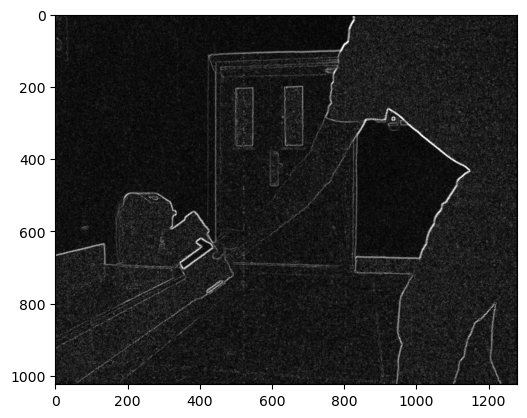

In [17]:
#scharr
sch3_x=cv2.Scharr(img_gray3,cv2.CV_64F,1,0)
sch3_y=cv2.Scharr(img_gray3,cv2.CV_64F,0,1)
sch3_x=cv2.convertScaleAbs(sch3_x)
sch3_y=cv2.convertScaleAbs(sch3_y)
img_edge3__=cv2.addWeighted(sch3_x,0.5,sch3_y,0.5,0)
plt_show(img_edge3__)


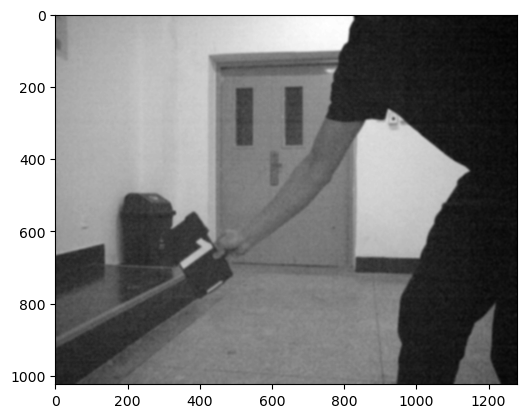

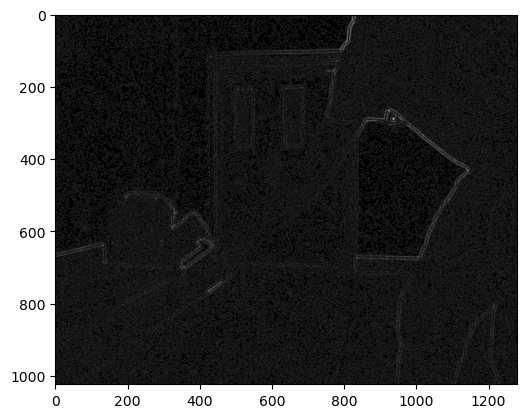

In [29]:
#laplas
gray_lap=cv2.blur(img_gray3,(7,7))
plt_show(gray_lap)
lap3=cv2.Laplacian(gray_lap,cv2.CV_64F,ksize=3)
lap3=cv2.convertScaleAbs(lap3)
plt_show(lap3)

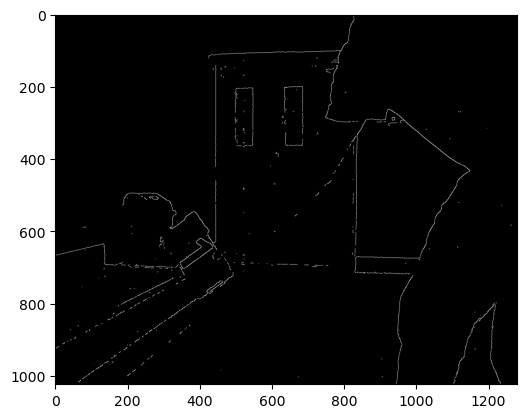

In [42]:
#canny
canny3=cv2.Canny(img_gray3,40,50)
plt_show(canny3)

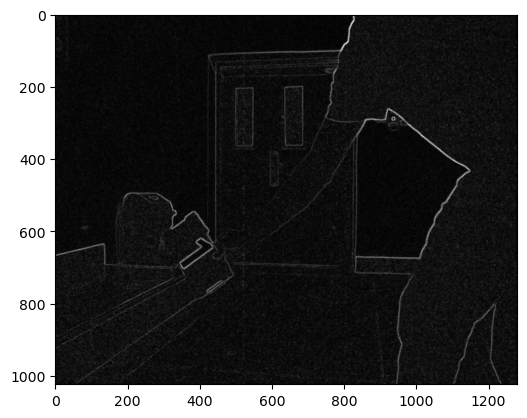

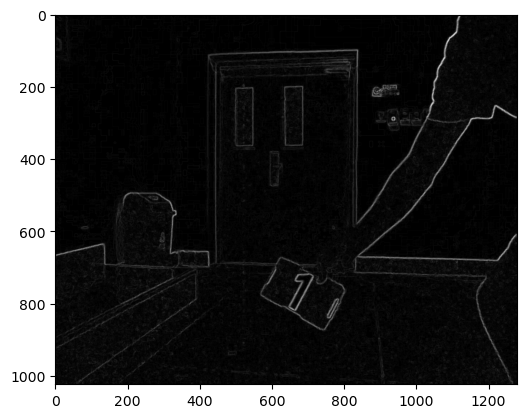

In [3]:
#sobel to get edge,ksize=3

img_x=cv2.Sobel(img_gray3,cv2.CV_64F,1,0,ksize=3)
img_y=cv2.Sobel(img_gray3,cv2.CV_64F,0,1,ksize=3)
img_x=cv2.convertScaleAbs(img_x)
img_y=cv2.convertScaleAbs(img_y)
img_edge3=cv2.addWeighted(img_x,0.5,img_y,0.5,0)
plt_show(img_edge3)
img_x=cv2.Sobel(img_gray2,cv2.CV_64F,1,0,ksize=3)
img_y=cv2.Sobel(img_gray2,cv2.CV_64F,0,1,ksize=3)
img_x=cv2.convertScaleAbs(img_x)
img_y=cv2.convertScaleAbs(img_y)
img_edge2=cv2.addWeighted(img_x,0.5,img_y,0.5,0)
plt_show(img_edge2)


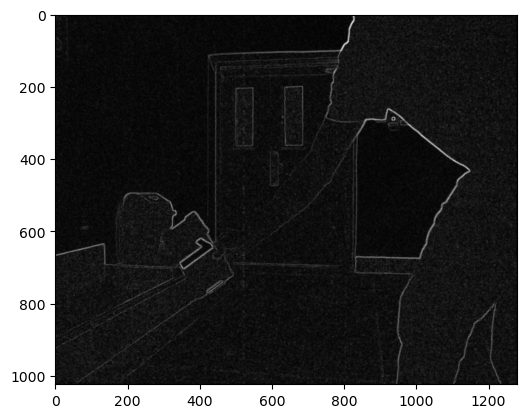

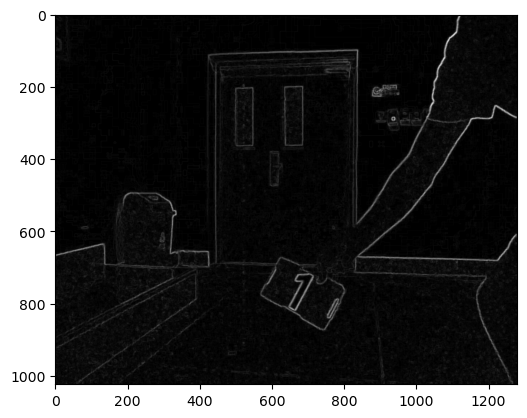

In [4]:
#gradient to get edge,ksize=3
ker=np.ones((3,3),np.uint8)
img_edge3_=cv2.morphologyEx(img_gray3,cv2.MORPH_GRADIENT,ker,iterations=1)
img_edge2_=cv2.morphologyEx(img_gray2,cv2.MORPH_GRADIENT,ker,iterations=1)
plt_show(img_edge3_)
plt_show(img_edge2_)

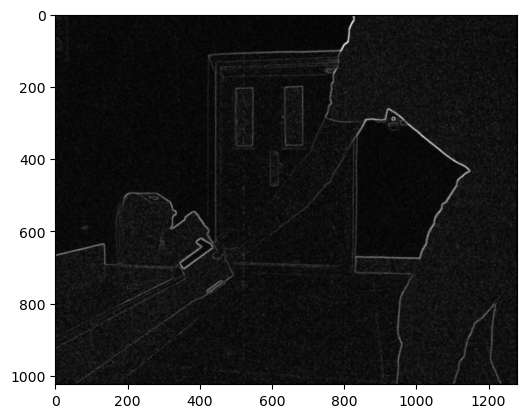

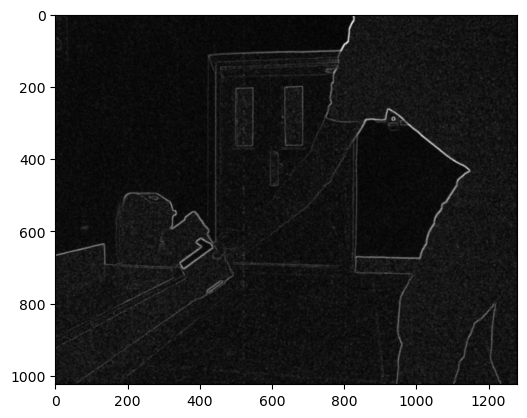

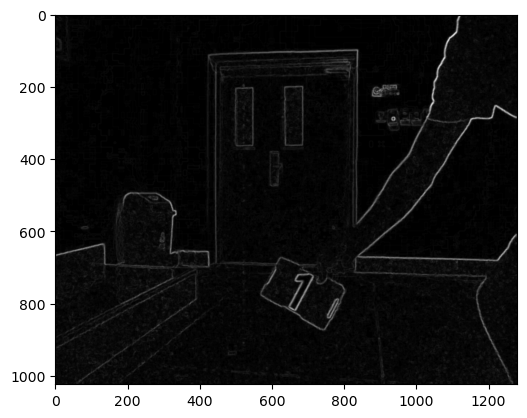

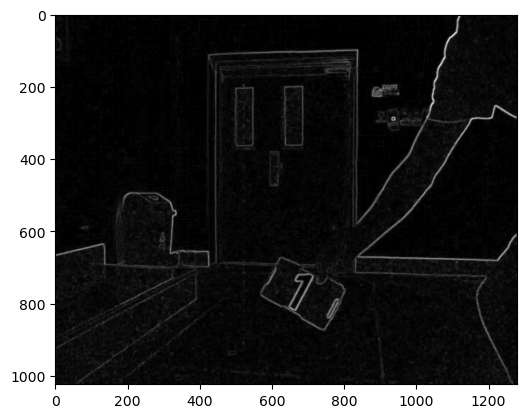

In [15]:
#before bin use blur, or bin will larger noise  
img_gus3=cv2.GaussianBlur(img_edge3,(3,3),1)
img_gus3_=cv2.GaussianBlur(img_edge3_,(3,3),1)
plt_show(img_gus3)
plt_show(img_gus3_)
img_gus2=cv2.GaussianBlur(img_edge2,(3,3),1)
img_gus2_=cv2.GaussianBlur(img_edge2_,(3,3),1)
plt_show(img_gus2)
plt_show(img_gus2_)

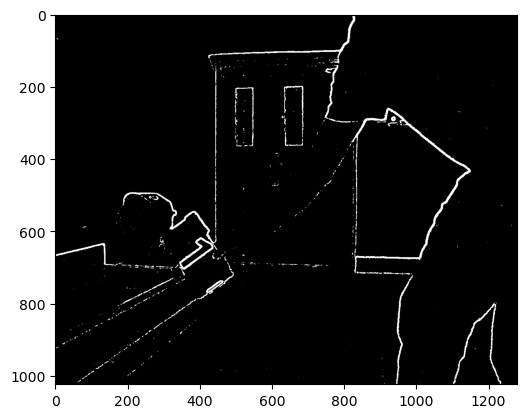

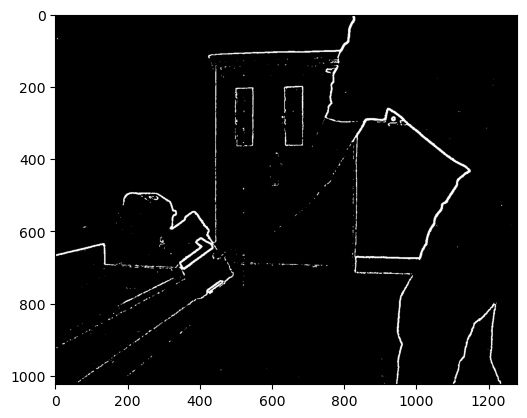

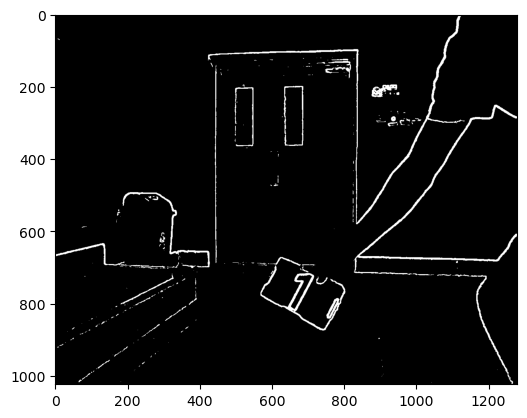

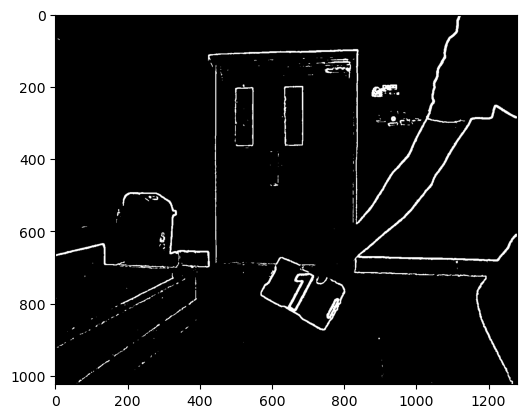

In [16]:
#use otsu to bin img3
ret,img_otsu3=cv2.threshold(img_gus3,0,255,cv2.THRESH_OTSU)
ret,img_otsu3_=cv2.threshold(img_gus3_,0,255,cv2.THRESH_OTSU)
plt_show(img_otsu3)
plt_show(img_otsu3_)
ret,img_otsu2=cv2.threshold(img_gus2,0,255,cv2.THRESH_OTSU)
ret,img_otsu2_=cv2.threshold(img_gus2_,0,255,cv2.THRESH_OTSU)
plt_show(img_otsu2)
plt_show(img_otsu2_)


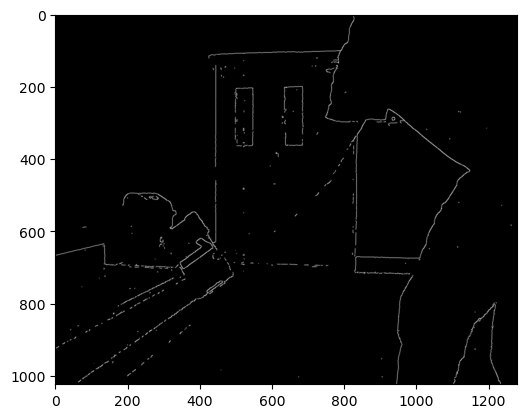

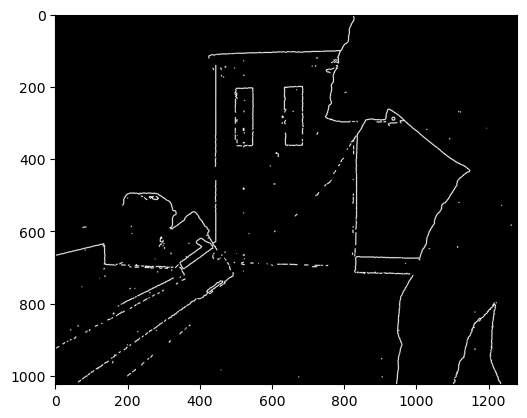

In [44]:
#bin canny
canny_gus3=cv2.GaussianBlur(canny3,(3,3),1)
plt_show(canny_gus3)
ret,canny_bin3=cv2.threshold(canny_gus3,0,255,cv2.THRESH_OTSU)
plt_show(canny_bin3)

In [45]:
cv2.imwrite('D:/pycv/lessons/res/sobel3.png',img_otsu3)
cv2.imwrite('D:/pycv/lessons/res/canny3.png',canny_bin3)
cv2.imwrite('D:/pycv/lessons/res/sobel2.png',img_otsu2)

True